In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
A = np.array([[-1, 3], [2, -2]])

In [7]:
v = np.array([[2], [1]])

In [59]:
def plot_vectors(vectors, colors, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vectors : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    colors : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors
    figsize : tuple (x_size,y_size)
        Size of the figure

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)
    vectors = [vec.flatten() for vec in vectors]

    for i in range(len(vectors)):
        x = np.concatenate([[0, 0], vectors[i]])
        plt.quiver(x[0], x[1], x[2], x[3],
                   angles='xy', scale_units='xy', scale=1, color=colors[i], alpha=alpha)

In [60]:
Av = A.dot(v)

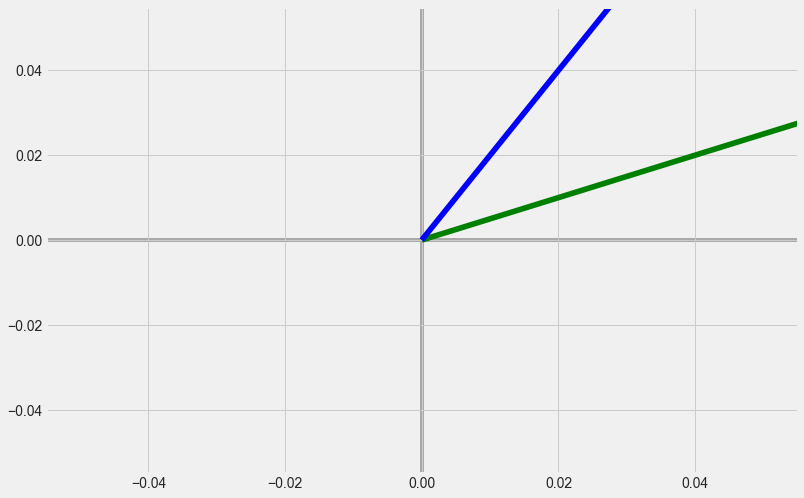

In [61]:
plot_vectors([v, Av], ['green', 'blue'])

## Eigenvectors
- We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gave us a new vector with the same direction. The scale can be different but the direction is the same. When applying a matrix does not change the direction of a vector, this special vector is called an eigenvector of the matrix.

In [80]:
A = np.array([[5, 1], [3, 3]])  # matrix
v1 = np.array([[1], [1]])  # eigen vector
Av1 = A.dot(v1)  # same direction  as v1
v1, Av1

(array([[1],
        [1]]),
 array([[6],
        [6]]))

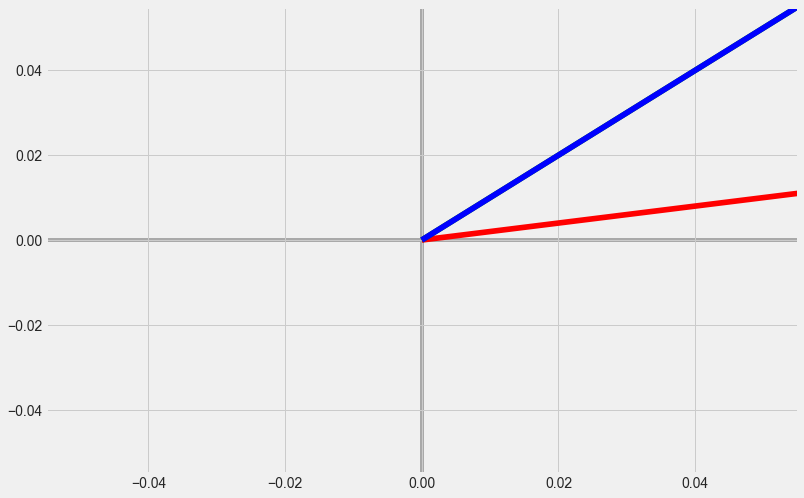

In [81]:
plot_vectors([A, Av1, v1], ['red', 'green', 'blue'])

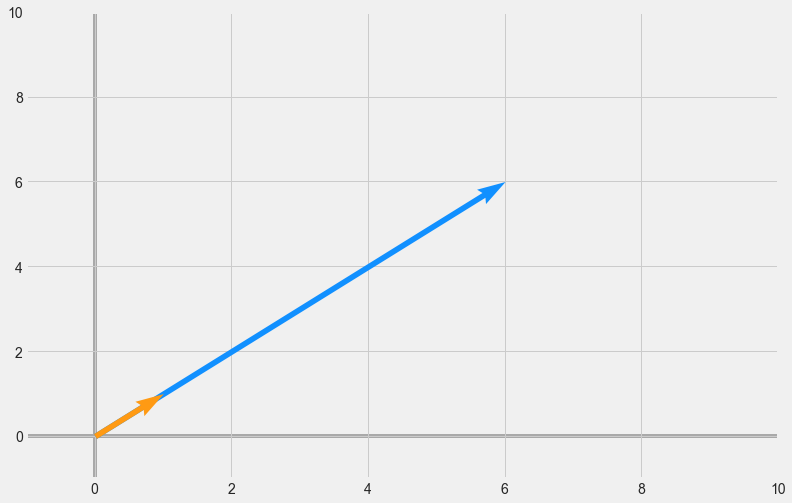

In [90]:
orange = '#FF9A13'
blue = '#1190FF'

plot_vectors([Av1, v1], colors=[blue, orange])
plt.ylim(-1, 10)
plt.xlim(-1, 10)
plt.show()

In [91]:
v2 = np.array([[1], [-3]])  # another eigenvector of A
Av2 = A.dot(v2)

(-10.0, 10.0)

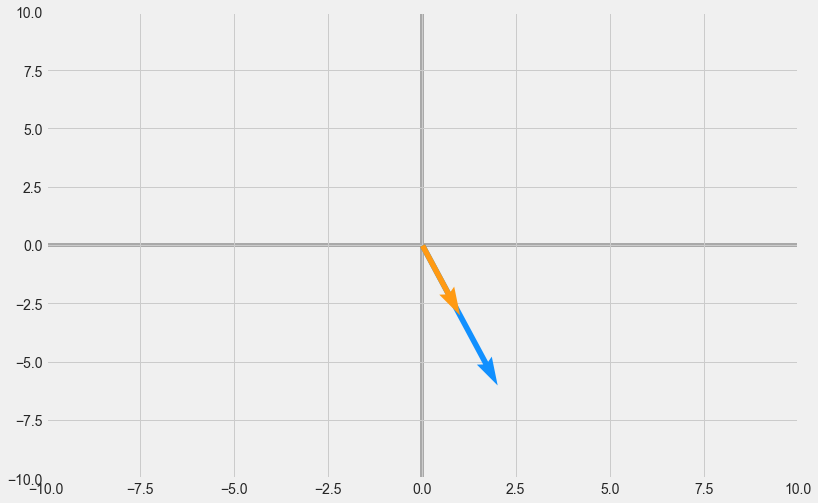

In [93]:
plot_vectors([Av2, v2], [blue, orange])
plt.ylim((-10, 10))
plt.xlim((-10, 10))

## Finding Eigenvalues and Eigenvectors With Numpy

In [104]:
A

array([[5, 1],
       [3, 3]])

In [105]:
eigenvals, eigen_V = np.linalg.eig(A)
eigenvals, eigen_V

(array([6., 2.]),
 array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

## Reconstructing Matrix A with Its Eigenvectors and Eigenvalues

In [106]:
lambdas = np.diag(eigenvals)  # Identity matrix times eigen values
lambdas

array([[6., 0.],
       [0., 2.]])

In [107]:
V_inv = np.linalg.inv(eigen_V)  # Inverse of eigen vector
V_inv

array([[ 1.06066017,  0.35355339],
       [-0.79056942,  0.79056942]])

In [108]:
A_orig = eigen_V.dot(lambdas).dot(V_inv)  # Restoring initial matrix
A_orig

array([[5., 1.],
       [3., 3.]])